In [1]:
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Tooth dataset'

In [3]:
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2025-01-29 00:13:56.230478: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-01-29 00:13:56.230501: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-01-29 00:13:56.230505: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-01-29 00:13:56.230528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-29 00:13:56.230539: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('Tooth dataset/*')
print("Detected classes:", folders)

Detected classes: ['Tooth dataset/hypodontia', 'Tooth dataset/Mouth Ulcer', 'Tooth dataset/Tooth Discoloration', 'Tooth dataset/caries', 'Tooth dataset/Calculus']


In [7]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
class_indices = {
    'hypodontia': 0,
    'Mouth Ulcer': 1,
    'Tooth Discoloration': 2,
    'caries': 3,
    'Calculus': 4
}

In [12]:
training_set = train_datagen.flow_from_directory('Tooth dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 classes=list(class_indices.keys()))

Found 5048 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Tooth dataset',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            classes=list(class_indices.keys()))


Found 5048 images belonging to 5 classes.


In [14]:
print("Class indices:", training_set.class_indices)

Class indices: {'hypodontia': 0, 'Mouth Ulcer': 1, 'Tooth Discoloration': 2, 'caries': 3, 'Calculus': 4}


In [15]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20


2025-01-29 00:13:59.813387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


158/158 [==============================] - ETA: 0s - loss: 2.5920 - accuracy: 0.7653

2025-01-29 00:14:25.379564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


158/158 [==============================] - 45s 278ms/step - loss: 2.5920 - accuracy: 0.7653 - val_loss: 0.4758 - val_accuracy: 0.9192
Epoch 2/20
158/158 [==============================] - 46s 293ms/step - loss: 1.0744 - accuracy: 0.8752 - val_loss: 0.6010 - val_accuracy: 0.9071
Epoch 3/20
158/158 [==============================] - 48s 303ms/step - loss: 0.9999 - accuracy: 0.8928 - val_loss: 0.7686 - val_accuracy: 0.9174
Epoch 4/20
158/158 [==============================] - 50s 320ms/step - loss: 1.1623 - accuracy: 0.8974 - val_loss: 0.5379 - val_accuracy: 0.9362
Epoch 5/20
158/158 [==============================] - 54s 342ms/step - loss: 1.0210 - accuracy: 0.9049 - val_loss: 0.4562 - val_accuracy: 0.9511
Epoch 6/20
158/158 [==============================] - 55s 351ms/step - loss: 0.9674 - accuracy: 0.9152 - val_loss: 0.6977 - val_accuracy: 0.9408
Epoch 7/20
158/158 [==============================] - 53s 336ms/step - loss: 0.9452 - accuracy: 0.9231 - val_loss: 0.6190 - val_accuracy: 0.9

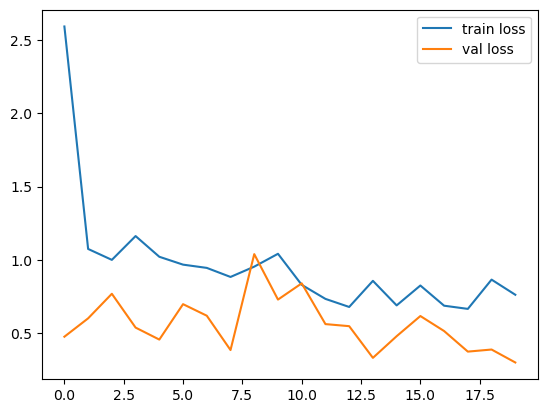

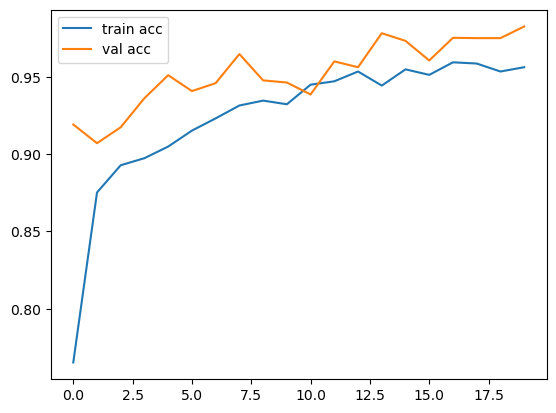

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.models import load_model
model.save('DentalDisease.h5')

In [21]:
y_pred = model.predict(test_set)
y_pred

158/158 [==============================] - 18s 111ms/step


array([[1.0000000e+00, 0.0000000e+00, 2.1239723e-23, 0.0000000e+00,
        0.0000000e+00],
       [1.3995654e-04, 5.5551950e-09, 9.9986005e-01, 4.5772229e-08,
        1.3348167e-28],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [3.9780327e-29, 0.0000000e+00, 5.7720123e-16, 2.1256078e-32,
        1.0000000e+00],
       [4.3605381e-37, 0.0000000e+00, 5.9889950e-32, 0.0000000e+00,
        1.0000000e+00],
       [4.2708920e-33, 0.0000000e+00, 1.3110976e-26, 1.1665543e-27,
        1.0000000e+00]], dtype=float32)